## Veri On Isleme

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv('telecustomer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [113]:
df_cleaned[pd.to_numeric(df["TotalCharges"], errors='coerce').isna()]

C:\Users\sadik.DESKTOP-CU116M0\AppData\Local\Temp\ipykernel_3676\1534351351.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned[pd.to_numeric(df["TotalCharges"], errors='coerce').isna()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [114]:
invalid_rows = pd.to_numeric(df["TotalCharges"], errors='coerce').isna()
df_cleaned = df.drop(index=df[invalid_rows].index)


In [115]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [116]:
df_cleaned["TotalCharges"] = pd.to_numeric(df_cleaned["TotalCharges"])


In [117]:
df = df_cleaned

In [118]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## EDA (Exploratory Data Analysis)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

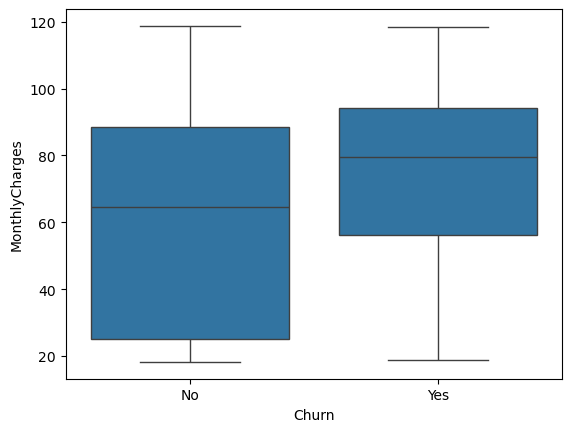

In [119]:
sns.boxplot(x= 'Churn', y= 'MonthlyCharges', data=df)

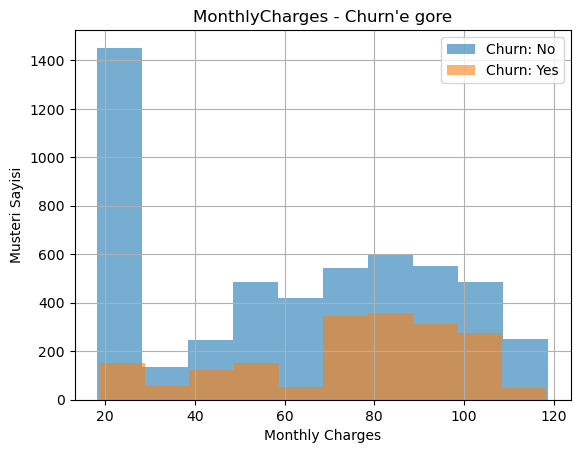

In [120]:
df[df['Churn'] == 'No']['MonthlyCharges'].plot(kind='hist', alpha=0.6, label='Churn: No')
df[df['Churn'] == 'Yes']['MonthlyCharges'].plot(kind='hist', alpha=0.6, label='Churn: Yes')

plt.title("MonthlyCharges - Churn'e gore")
plt.xlabel('Monthly Charges')
plt.ylabel('Musteri Sayisi')
plt.legend()
plt.grid(True)
plt.show()

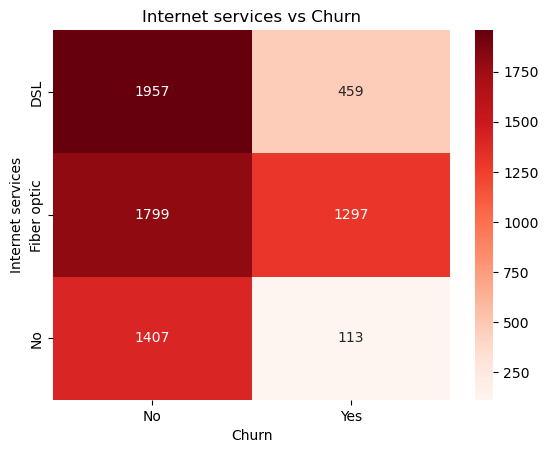

In [121]:
## heatmap uzerinden internet saglayicilarina gore churn degerini bulmak adina capraz tablo olusturacagim
cross_tab = pd.crosstab(df['InternetService'],df['Churn'])

#cizim asamasi
plt.Figure(figsize=(6,4))
sns.heatmap(cross_tab,annot=True,fmt='d',cmap='Reds')

plt.title('Internet services vs Churn')
plt.ylabel('Internet services')
plt.xlabel('Churn')
plt.show()

Fiber optik kullananlarda ciddi derecede churn orani yuksek. Burdan yola cikarak olasi yorumlarimiz bu olabilir:

1) Fiyat-Performans dengesizligi,
2) Hizmet kalite problemi,
3) Yuksek Fatura degerleri (Monthly Charges)

Burdaki yorumlarimizdan internet servisleri ve aylik fatura degerleri arasinda bir oran var mi kontrol edebiliriz

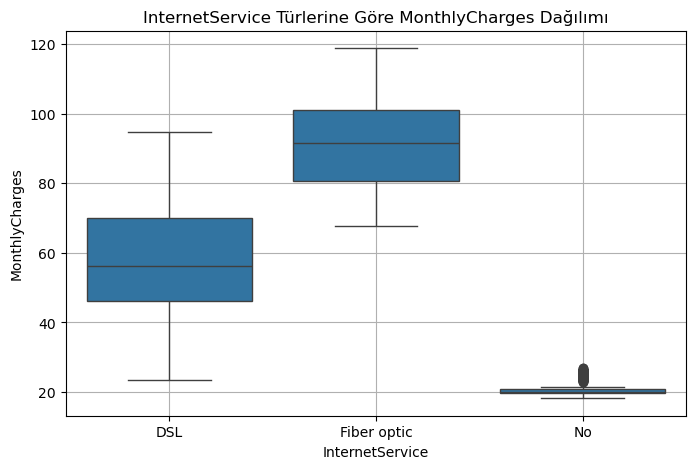

In [122]:
plt.figure(figsize=(8,5))
sns.boxplot(x='InternetService',y='MonthlyCharges',data=df)

plt.title("InternetService Türlerine Göre MonthlyCharges Dağılımı")
plt.xlabel("InternetService")
plt.ylabel("MonthlyCharges")
plt.grid(True)
plt.show()


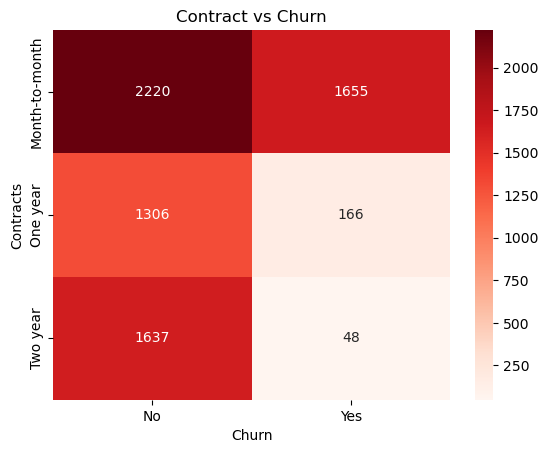

In [123]:
cross_tab1 = pd.crosstab(df['Contract'],df['Churn'])

#cizim asamasi
plt.Figure(figsize=(6,4))
sns.heatmap(cross_tab1,annot=True,fmt='d',cmap='Reds')

plt.title('Contract vs Churn')
plt.ylabel('Contracts')
plt.xlabel('Churn')
plt.show()

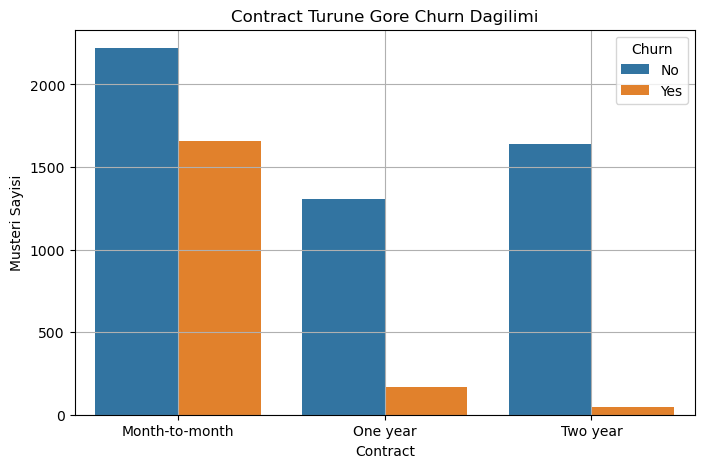

In [124]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn')

plt.title("Contract Turune Gore Churn Dagilimi")
plt.xlabel("Contract")
plt.ylabel("Musteri Sayisi")
plt.grid(True)
plt.show()


## Feature Engineering

In [140]:
#Bu adimda ekledigim sutunlari eklemeden onceki modellemenin verdigi degerler:
#
#    Accuracy: 0.8024164889836531
#Confusion Matrix:
# [[915 118]
# [160 214]]
#Classification Report:
#               precision    recall  f1-score   support
#
#           0       0.85      0.89      0.87      1033
#           1       0.64      0.57      0.61       374
#
#    accuracy                           0.80      1407
#   macro avg       0.75      0.73      0.74      1407
#weighted avg       0.80      0.80      0.80      1407

In [ ]:
# TotalCharges/Tenure yaparak average monthly payment'i hesapliyoruz 

df["AvgMonthlyCharge"] = df["TotalCharges"] / df["tenure"].replace(0, 1)

In [131]:
# Musterinin kullandigi farkli hizmet miktarini da bulalim

services = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", 
            "TechSupport", "StreamingTV", "StreamingMovies"]

df['TotalServices'] = df[services].apply(lambda row: sum(val == 'Yes' for val in row), axis=1)

## Encoding

In [133]:
df_encoded = pd.get_dummies(df.drop("customerID", axis=1), drop_first=True)
df_encoded = df_encoded.astype(int)

In [134]:
X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]


In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [136]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)


c:\Users\sadik.DESKTOP-CU116M0\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.728500355366027
Confusion Matrix:
 [[728 305]
 [ 77 297]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



Yeni modelleme ile birlikte accuracy oranimiz dustu fakat degisimlerin 'gercek hayatta' daha isimize yarayacagini dusundugum bir neden var, bu da:

Recall(Churn = 1) degerinin yukselmesi

yani model artık daha fazla churn eden (gidecek) müşteriyi yakalıyor, bu da iş açısından çok kıymetli cunku:

1) yanlış pozitif bir alarm (müşteri bırakmıyor ama öyle sanıyoruz) = önlem alırız, zarar yok

2) Ama yanlış negatif (müşteri gidiyor ama fark etmiyoruz) = gerçek kayıp

#  K-Nearest Neighbour

KNN ile tekrar gozden gecirelim

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [143]:
y_pred_knn = knn.predict(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Accuracy: 0.7505330490405118
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.53      0.53      0.53       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407

